# Cohort analysis


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [34]:
df = pd.read_excel('./ppp.xlsx', sheet_name=1)
df.head()
pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2


 


df.set_index('Client ID', inplace=True)
df['JoinMonth'] = df.groupby(level=0)['Sale Date'].min() #добавим столбец JoinMonth
df.reset_index(inplace=True) #переиндексируем df

df.insert(len(df.columns), "TotalOrders", 0, allow_duplicates=False) #создадим столбец в котором далее поместим количество заказов
df.head()
grouped = df.groupby(['JoinMonth', 'Sale Date'])
# количество уникальных пользователей и общее количество заказов и выручка за период
cohorts = grouped.agg({'Client ID': pd.Series.nunique, 'TotalOrders': pd.Series.count, 'Item Total': np.sum})
# переименуем некоторые столбцы для большей наглядности
cohorts.rename(columns={'Client ID': 'TotalUsers',
 'TotalOrders': 'TotalOrders'}, inplace=True)
cohorts.head()
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1 # отсчет с 1
    return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()
# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortPeriod','JoinMonth'], inplace=True)
# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['TotalUsers'].groupby(level=1).first()
cohort_group_size.head()
cohorts[‘TotalUsers’].head()

TotalUsers  TotalOrders  Item Total  CohortPeriod
JoinMonth  Sale Date                                                    
2014-12-19 2014-12-19           1            2      262.00             1
           2015-01-17           1            1       15.00             2
           2015-02-14           1            1       22.00             3
           2016-03-07           1            1       50.00             4
2015-01-05 2015-01-05           3            7       38.15             1

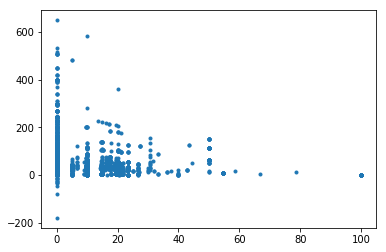

In [32]:
plt.plot(df['Discount %'],df['Item Total'], marker='.',linewidth=0)

In [33]:
by_clients = df.groupby(by='Client ID')[('Tax','Discount %')].mean()

In [27]:
df['real_item_total'] = df['Item price (excluding tax)'] * df['Quantity'] - df['Discount amount'] + df['Tax']
df.head()

,Sale Date,Client ID,Client,Sale ID,Item name,Sales Notes,Location,Notes,Color,Size,Item price (excluding tax),Quantity,Subtotal (excluding tax),Discount %,Discount amount,Tax,Item Total,Total Paid w/ Payment Method,Payment Method,real_item_total
0,2014-12-19,55555рррр,"Client, Test",3,6 sessijas 45min,NaN,[BREEZE} AQUAFIT & VITALITY SPA Center,NaN,---,---,157.03,1,157.03,0.0,0.00,32.97,190.0,190.0,Cash,190.0
1,2014-12-19,55555рррр,"Client, Test",3,1 sessija,NaN,[BREEZE} AQUAFIT & VITALITY SPA Center,NaN,---,---,66.11,1,66.11,10.0,6.61,12.50,72.0,72.0,Cash,72.0
2,2015-01-05,100000003,"Gromova, Jelena",4,1 sessija 30 min,NaN,[BREEZE} AQUAFIT & VITALITY SPA Center,NaN,---,---,11.16,1,11.16,0.0,0.00,2.34,13.5,13.5,Cash,13.5
3,2015-01-05,1,"Walk-in, Walk-in",25,Tēja PUKKA,NaN,[BREEZE} AQUAFIT & VITALITY SPA Center,NaN,---,---,3.72,1,3.72,0.0,0.00,0.78,4.5,4.5,Cash,4.5
4,2015-01-05,1,"Walk-in, Walk-in",28,Tēja,NaN,[BREEZE} AQUAFIT & VITALITY SPA Center,NaN,---,---,1.49,1,1.49,16.5,0.25,0.26,1.5,1.5,Cash,1.5


In [ ]:
df.sql

In [1]:
pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2


 



df['JoinMonth'] = df.groupby(level=0)['Sale Date'].min(). #добавим столбец JoinMonth
df.reset_index(inplace=True) #переиндексируем df

df.insert(len(df.columns), "TotalOrders", 0, allow_duplicates=False) #создадим столбец в котором далее поместим количество заказов

#свернем данные в когорты
grouped = df.groupby(['JoinMonth', 'OrderPeriod'])

# количество уникальных пользователей и общее количество заказов и выручка за период
cohorts = grouped.agg({'ClientID': pd.Series.nunique,
                       'TotalOrders': pd.Series.count, 
                       'Revenue': np.sum})

# переименуем некоторые столбцы для большего понимания
cohorts.rename(columns={'ClientID': 'TotalUsers',
                        'TotalOrders': 'TotalOrders'}, inplace=True)

# добавим ярлык для периодов
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)

#посчитаем retention

# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['JoinMonth','CohortPeriod'], inplace=True)

# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohorts['TotalUsers'].unstack(0)
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

user_retention[['2015-09', '2015-10', '2015-12']].plot(figsize=(20,10))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1)) # разбивка оси X
plt.xlim(1, 12) #ось X
plt.ylabel('% of Cohort Purchasing');

import seaborn as sns
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.00%');




## Расчитаем частоту покупок по когортам
c = cohorts['TotalOrders']/cohorts['TotalUsers']
opc = c.unstack(0)

opc[['2015-09', '2015-10', '2015-12']].plot(figsize=(20,10))
plt.title('Cohorts: OrdersPerUser')
plt.xticks(np.arange(1, 12.1, 1)) # разбивка оси X
plt.xlim(1, 12) #ось X
plt.ylabel('% of Cohort Purchasing');

#cohortsOPC = cohorts['TotalOrders']/cohorts['TotalUsers']

import seaborn as sns
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: Orders Per User')
sns.heatmap(opc.T, mask=opc.T.isnull(), annot=True, fmt='.3');

AttributeError: 'DataFrame' object has no attribute 'orderDTE'